# Creating Korean Wordcloud with NAVER News Articles

## Import Library Packages

### Basic

In [1]:
import pandas as pd, numpy as np, os, warnings; warnings.filterwarnings('ignore')

### Bag of Words(BoW)

In [2]:
from konlpy.tag import Okt
from tqdm import tqdm

### Korean Wordcloud

In [3]:
import nltk # natural language tool kit
from konlpy.corpus import kolaw
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont

---

## DataFrame 불러오기

In [4]:
art_df = pd.read_csv("../Data/Crawling_Data/서울지하철혼잡AI예측_20240604_15시10분47초.csv")

art_df.head()

,date,title,link,content
0,2023-11-02 12:01:07,지하철역 승강장 혼잡도 실시간 예측한다,https://n.news.naver.com/mnews/article/018/000...,"[\n행안부, 'AI 기반 지하철 승강장 혼잡도 예측 모델' 개발서울지하철 2개 역..."
1,2023-11-02 13:44:29,‘혼잡률 200% 육박’ 서울지하철…AI가 ‘심각’ 판단하면 진입 통제,https://n.news.naver.com/mnews/article/056/001...,"[\n\n\n\n\n김포시민들이 서울로 출퇴근할 때 주로 이용하는 교통수단, 김포 ..."
2,2023-11-03 05:34:00,의자 없애고 혼잡도 실시간 분석…서울 '지옥철' 오명 벗나,https://n.news.naver.com/mnews/article/421/000...,[\n승강장 혼잡도 AI 분석모델 장한평·군자역 시범적용'혼잡도 심각' 4·7호선 ...
3,2023-06-23 14:40:01,"김혜지 서울시의원, 지하철역 혼잡도…다양한 개선대책 추진",https://n.news.naver.com/mnews/article/081/000...,"[\n김 의원, 서울교통공사가 개발 중인 혼잡도 평가시스템 점검천호역을 비롯한 혼잡..."
4,2020-09-14 11:44:43,"SKT ""서울 지하철 1~8호선 혼잡도 미리 확인한다""",https://n.news.naver.com/mnews/article/629/000...,[\n\n\n\n\nSK텔레콤이 지하철의 칸별 혼잡도 예측 정보를 'T맵 대중교통'...


## 기사 본문을 형태소 단위로 분리하기

In [5]:
art_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     10 non-null     object
 1   title    10 non-null     object
 2   link     10 non-null     object
 3   content  10 non-null     object
dtypes: object(4)
memory usage: 452.0+ bytes


In [6]:
# 각 기사의 본문에서 명사, 형용사, 동사, 부사를 추출하여 List에 저장 후 Dictionary에 저장
okt = Okt()
poss_dic = {}

for i in tqdm(art_df.index) :
  ## 1.
  main = art_df.loc[i, "content"]
  poss = okt.pos(main, norm = True, stem = True)

  ## 2.
  poss_lst = []
  for word, tag in poss :
    if tag in ['Noun','Adjective','Verb','Adverb']:
      poss_lst.append(word)

  ## 3. 
  poss_dic[i] = poss_lst

100%|██████████| 10/10 [00:02<00:00,  3.38it/s]


In [7]:
poss_dic

{0: ['행안부',
  '기반',
  '지하철',
  '승강장',
  '혼잡',
  '예측',
  '모델',
  '개발',
  '서울',
  '지하철',
  '개',
  '역',
  '시범',
  '적용',
  '정확도',
  '표준',
  '모델',
  '추진',
  '이데일리',
  '이연호',
  '기자',
  '정부',
  '지하철역',
  '승강장',
  '혼잡',
  '상황',
  '실시간',
  '파악',
  '하다',
  '수',
  '있다',
  '인공',
  '지능',
  '기반',
  '데이터',
  '분석',
  '모델',
  '개발',
  '하다',
  '달',
  '현장',
  '시범',
  '적용',
  '하다',
  '전자',
  '관제',
  '실',
  '대시보드',
  '화면',
  '사진',
  '행정안전부',
  '행정안전부',
  '통합',
  '데이터',
  '센터',
  '지난',
  '지하철',
  '김포',
  '골드',
  '라인',
  '샘플',
  '진행',
  '하다',
  '온',
  '기반',
  '지하철',
  '승강장',
  '혼잡',
  '예측',
  '모델',
  '개발',
  '마치',
  '달',
  '지하철',
  '시범',
  '적용',
  '하다',
  '밝히다',
  '이번',
  '개발',
  '되다',
  '모델',
  '가다',
  '산출',
  '지하철',
  '승강장',
  '체류',
  '인원',
  '토대',
  '승강장',
  '면적',
  '고려',
  '밀도',
  '혼잡',
  '률',
  '산출',
  '뒤',
  '그',
  '수준',
  '단계',
  '단계',
  '구분',
  '하다',
  '표',
  '출하',
  '개념',
  '모델',
  '개발',
  '과정',
  '통합',
  '데이터',
  '센터',
  '서울',
  '교통',
  '공사',
  '김포',
  '골드',
  '라인',
  '함께',
  '참여',
  '하다',
  '지하철',


## 각 기사의 형태소들을 Bag of Words(BoW)에 담기

### 모든 News 기사 본문의 형태소들을 List에 저장

In [8]:
all_words = []

for words in poss_dic.values() :
  all_words.extend(words)
  all_words = list(all_words)

## 각각의 기사마다 특정 단어가 몇 번 나왔는지를 나타내는 DataFrame (BoW) 생성

In [9]:
datas = []

for i in tqdm(art_df.index) :
    words = poss_dic[i]  # 형태소가 분리된 단어들을 모아놓은 List
    vc = pd.Series(words).value_counts() # (key: 형태소, values: 빈도수)
    data = vc.to_dict()
    datas.append(data)

df = pd.DataFrame(
    datas,
    index = art_df.index,
    columns = all_words
)

100%|██████████| 10/10 [00:00<00:00, 1108.75it/s]


In [10]:
df

,행안부,기반,지하철,승강장,혼잡,예측,모델,개발,서울,지하철,...,건강,행복,함께,하다,기원,하다,새해,복,많이,받다
0,4.0,3.0,12,11.0,14,2,13.0,7.0,3.0,12,...,NaN,NaN,3.0,16,NaN,16,NaN,NaN,NaN,NaN
1,NaN,2.0,3,8.0,10,1,4.0,NaN,5.0,3,...,NaN,NaN,1.0,15,NaN,15,NaN,NaN,NaN,NaN
2,2.0,1.0,6,3.0,11,1,4.0,2.0,3.0,6,...,NaN,NaN,NaN,15,NaN,15,NaN,NaN,NaN,NaN
3,NaN,2.0,5,1.0,19,1,NaN,5.0,1.0,5,...,NaN,NaN,1.0,23,NaN,23,NaN,NaN,NaN,NaN
4,NaN,NaN,9,NaN,12,3,NaN,NaN,1.0,9,...,NaN,NaN,NaN,21,NaN,21,NaN,NaN,NaN,NaN
5,NaN,5.0,19,NaN,9,2,NaN,NaN,2.0,19,...,NaN,NaN,NaN,28,NaN,28,NaN,NaN,NaN,NaN
6,NaN,NaN,4,2.0,4,2,5.0,2.0,NaN,4,...,NaN,NaN,NaN,19,NaN,19,NaN,NaN,NaN,NaN
7,NaN,2.0,1,NaN,1,1,NaN,NaN,6.0,1,...,NaN,NaN,2.0,20,NaN,20,NaN,NaN,NaN,NaN
8,NaN,2.0,1,NaN,1,8,3.0,NaN,4.0,1,...,NaN,NaN,NaN,33,NaN,33,NaN,NaN,NaN,NaN
9,NaN,NaN,4,NaN,1,1,NaN,NaN,2.0,4,...,1.0,1.0,7.0,69,1.0,69,3.0,1.0,1.0,1.0


### Nan Data를 모두 0으로 변경하기

In [11]:
df = df.fillna(0)

df

,행안부,기반,지하철,승강장,혼잡,예측,모델,개발,서울,지하철,...,건강,행복,함께,하다,기원,하다,새해,복,많이,받다
0,4.0,3.0,12,11.0,14,2,13.0,7.0,3.0,12,...,0.0,0.0,3.0,16,0.0,16,0.0,0.0,0.0,0.0
1,0.0,2.0,3,8.0,10,1,4.0,0.0,5.0,3,...,0.0,0.0,1.0,15,0.0,15,0.0,0.0,0.0,0.0
2,2.0,1.0,6,3.0,11,1,4.0,2.0,3.0,6,...,0.0,0.0,0.0,15,0.0,15,0.0,0.0,0.0,0.0
3,0.0,2.0,5,1.0,19,1,0.0,5.0,1.0,5,...,0.0,0.0,1.0,23,0.0,23,0.0,0.0,0.0,0.0
4,0.0,0.0,9,0.0,12,3,0.0,0.0,1.0,9,...,0.0,0.0,0.0,21,0.0,21,0.0,0.0,0.0,0.0
5,0.0,5.0,19,0.0,9,2,0.0,0.0,2.0,19,...,0.0,0.0,0.0,28,0.0,28,0.0,0.0,0.0,0.0
6,0.0,0.0,4,2.0,4,2,5.0,2.0,0.0,4,...,0.0,0.0,0.0,19,0.0,19,0.0,0.0,0.0,0.0
7,0.0,2.0,1,0.0,1,1,0.0,0.0,6.0,1,...,0.0,0.0,2.0,20,0.0,20,0.0,0.0,0.0,0.0
8,0.0,2.0,1,0.0,1,8,3.0,0.0,4.0,1,...,0.0,0.0,0.0,33,0.0,33,0.0,0.0,0.0,0.0
9,0.0,0.0,4,0.0,1,1,0.0,0.0,2.0,4,...,1.0,1.0,7.0,69,1.0,69,3.0,1.0,1.0,1.0


## 불용어 추가

In [12]:
stop_words = [
  '하다', '있다', '되다', '데이터', '분석', '수', '등', '것', '모델',
  '통해', '공사', '개', '성남', '제공', '기반', '이다', '도르다',
  '않다', '함께', '및', '명', '이용', '위', '이', '다', '이르다', '더',
  '홍대', '여러분', '지난', '이번', '돼다', '따르다', '내', '대한', '시',
  '도', '텔레콤', '위해', '성남시', '통합', '센터', '률', '하차', '새롭다',
  '가능하다', '로', '확인'
]

token_ko = [each_word for each_word in df if each_word not in stop_words]

token_ko

['행안부',
 '지하철',
 '승강장',
 '혼잡',
 '예측',
 '개발',
 '서울',
 '지하철',
 '역',
 '시범',
 '적용',
 '정확도',
 '표준',
 '추진',
 '이데일리',
 '이연호',
 '기자',
 '정부',
 '지하철역',
 '승강장',
 '혼잡',
 '상황',
 '실시간',
 '파악',
 '인공',
 '지능',
 '개발',
 '달',
 '현장',
 '시범',
 '적용',
 '전자',
 '관제',
 '실',
 '대시보드',
 '화면',
 '사진',
 '행정안전부',
 '행정안전부',
 '지하철',
 '김포',
 '골드',
 '라인',
 '샘플',
 '진행',
 '온',
 '지하철',
 '승강장',
 '혼잡',
 '예측',
 '개발',
 '마치',
 '달',
 '지하철',
 '시범',
 '적용',
 '밝히다',
 '개발',
 '가다',
 '산출',
 '지하철',
 '승강장',
 '체류',
 '인원',
 '토대',
 '승강장',
 '면적',
 '고려',
 '밀도',
 '혼잡',
 '산출',
 '뒤',
 '그',
 '수준',
 '단계',
 '단계',
 '구분',
 '표',
 '출하',
 '개념',
 '개발',
 '과정',
 '서울',
 '교통',
 '김포',
 '골드',
 '라인',
 '참여',
 '지하철',
 '승',
 '태그',
 '교통카드',
 '정산',
 '열차',
 '추다',
 '도착',
 '건의',
 '활용',
 '승강장',
 '체류',
 '인원',
 '승차',
 '게이트',
 '통과',
 '후',
 '승강장',
 '지하철',
 '기다리다',
 '인원',
 '지하철',
 '후',
 '승강장',
 '게이트',
 '이동',
 '인원',
 '의미',
 '해당',
 '역',
 '실시간',
 '승',
 '게이트',
 '통과',
 '인원',
 '이전',
 '역',
 '승',
 '게이트',
 '통과',
 '인원',
 '해당',
 '시간대',
 '과거',
 '승',
 '인원',
 '종합',
 '승강장',
 '실시간',
 '체류',
 '인원

## 상위 50개 단어 분석

In [13]:
ko = nltk.Text(token_ko)

ko.vocab().most_common(50)

[('혼잡', 82),
 ('지하철', 64),
 ('시민', 29),
 ('서울', 27),
 ('호선', 27),
 ('승강장', 25),
 ('단계', 25),
 ('교통', 24),
 ('실시간', 23),
 ('시스템', 23),
 ('예측', 22),
 ('인파', 22),
 ('열차', 20),
 ('활용', 20),
 ('안전', 20),
 ('서비스', 20),
 ('상황', 17),
 ('관리', 17),
 ('개발', 16),
 ('인원', 16),
 ('추진', 15),
 ('기술', 15),
 ('승객', 15),
 ('경로', 15),
 ('역사', 14),
 ('올해', 14),
 ('도시', 13),
 ('시간', 13),
 ('대중교통', 13),
 ('시범', 12),
 ('적용', 12),
 ('지능', 12),
 ('행정안전부', 12),
 ('위험', 12),
 ('개선', 12),
 ('정보', 12),
 ('지역', 12),
 ('인공', 11),
 ('버스', 11),
 ('설치', 11),
 ('환승', 10),
 ('서울시', 10),
 ('밀집', 10),
 ('산업', 10),
 ('역', 9),
 ('관제', 9),
 ('대책', 9),
 ('현장', 8),
 ('사고', 8),
 ('없다', 8)]

## 상위 50개의 빈도수 Chart 만들기

In [14]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

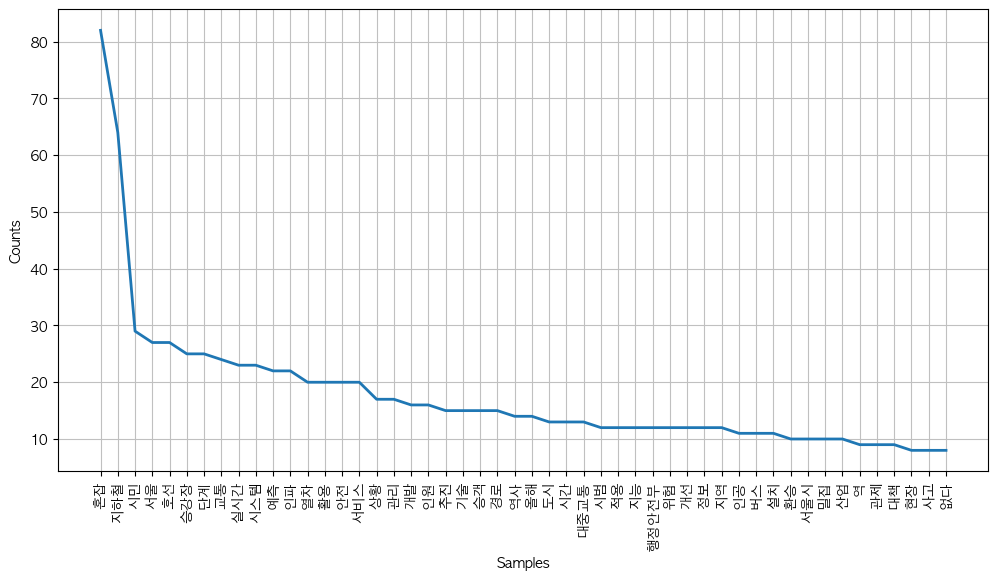

In [15]:
plt.figure(figsize = (12, 6))

ko.plot(50)

plt.show()

---

## 상위 50개만 Word Cloud 그리기

### Mask Image 생성하기

In [16]:
# Mask Image Size 설정
width, height = 800, 400

# 빈 Image 생성 (흰색 배경)
image = Image.new('RGB', (width, height), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Font Type 및 Size 설정
font_path = "AppleGothic"  # 시스템에 따라 경로 변경 필요
font_size = 200
font = ImageFont.truetype(font_path, font_size)

# Text 위치 계산
text = "Subway"
text_bbox = draw.textbbox((0, 0), text, font = font)
text_width = text_bbox[2] - text_bbox[0]
text_height = text_bbox[3] - text_bbox[1]
position = ((width - text_width) // 2, (height - text_height) // 2)

# Text 그리기 (검은색)
draw.text(
  position,
  text,
  font = font,
  fill = 'black'
)

os.makedirs("Images", exist_ok = True) # Create Directory for Mask Image save files

# Save Image File
image.save('Images/subway_mask.png')

In [25]:
# 단어 목록 생성
data = ko.vocab().most_common(50)
tmp_data = dict(data)

# Mask Image Load
mask = np.array(Image.open("Images/heart_mask.jpg"))
# mask_font_color = np.array(Image.open("Images/edgar-chaparro-Xp9Vf9AXepE.jpg"))

# WordCloud 객체 생성
wordcloud = WordCloud(
    font_path = 'AppleGothic',  # Font File Path
    background_color = 'White',  # Background Color
    mask = mask,  # Mask Image 설정
    # max_font_size = 100,  # 최대 Font 크기
    # max_words = 200,  # 최대 Word 수
    # colormap = plt.cm.Pastel1,  # 색상 Palette
    colormap = 'seismic',  # 색상 Palette
    prefer_horizontal = True,  # 가로 방향 단어 비율
    relative_scaling = 0.5,  # 단어 크기 Scaling
    width = 1920,
    height = 1080
).generate_from_frequencies(tmp_data)

# # Image Color 생성
# image_colors = ImageColorGenerator(mask_font_color)

### WordCloud Image 생성

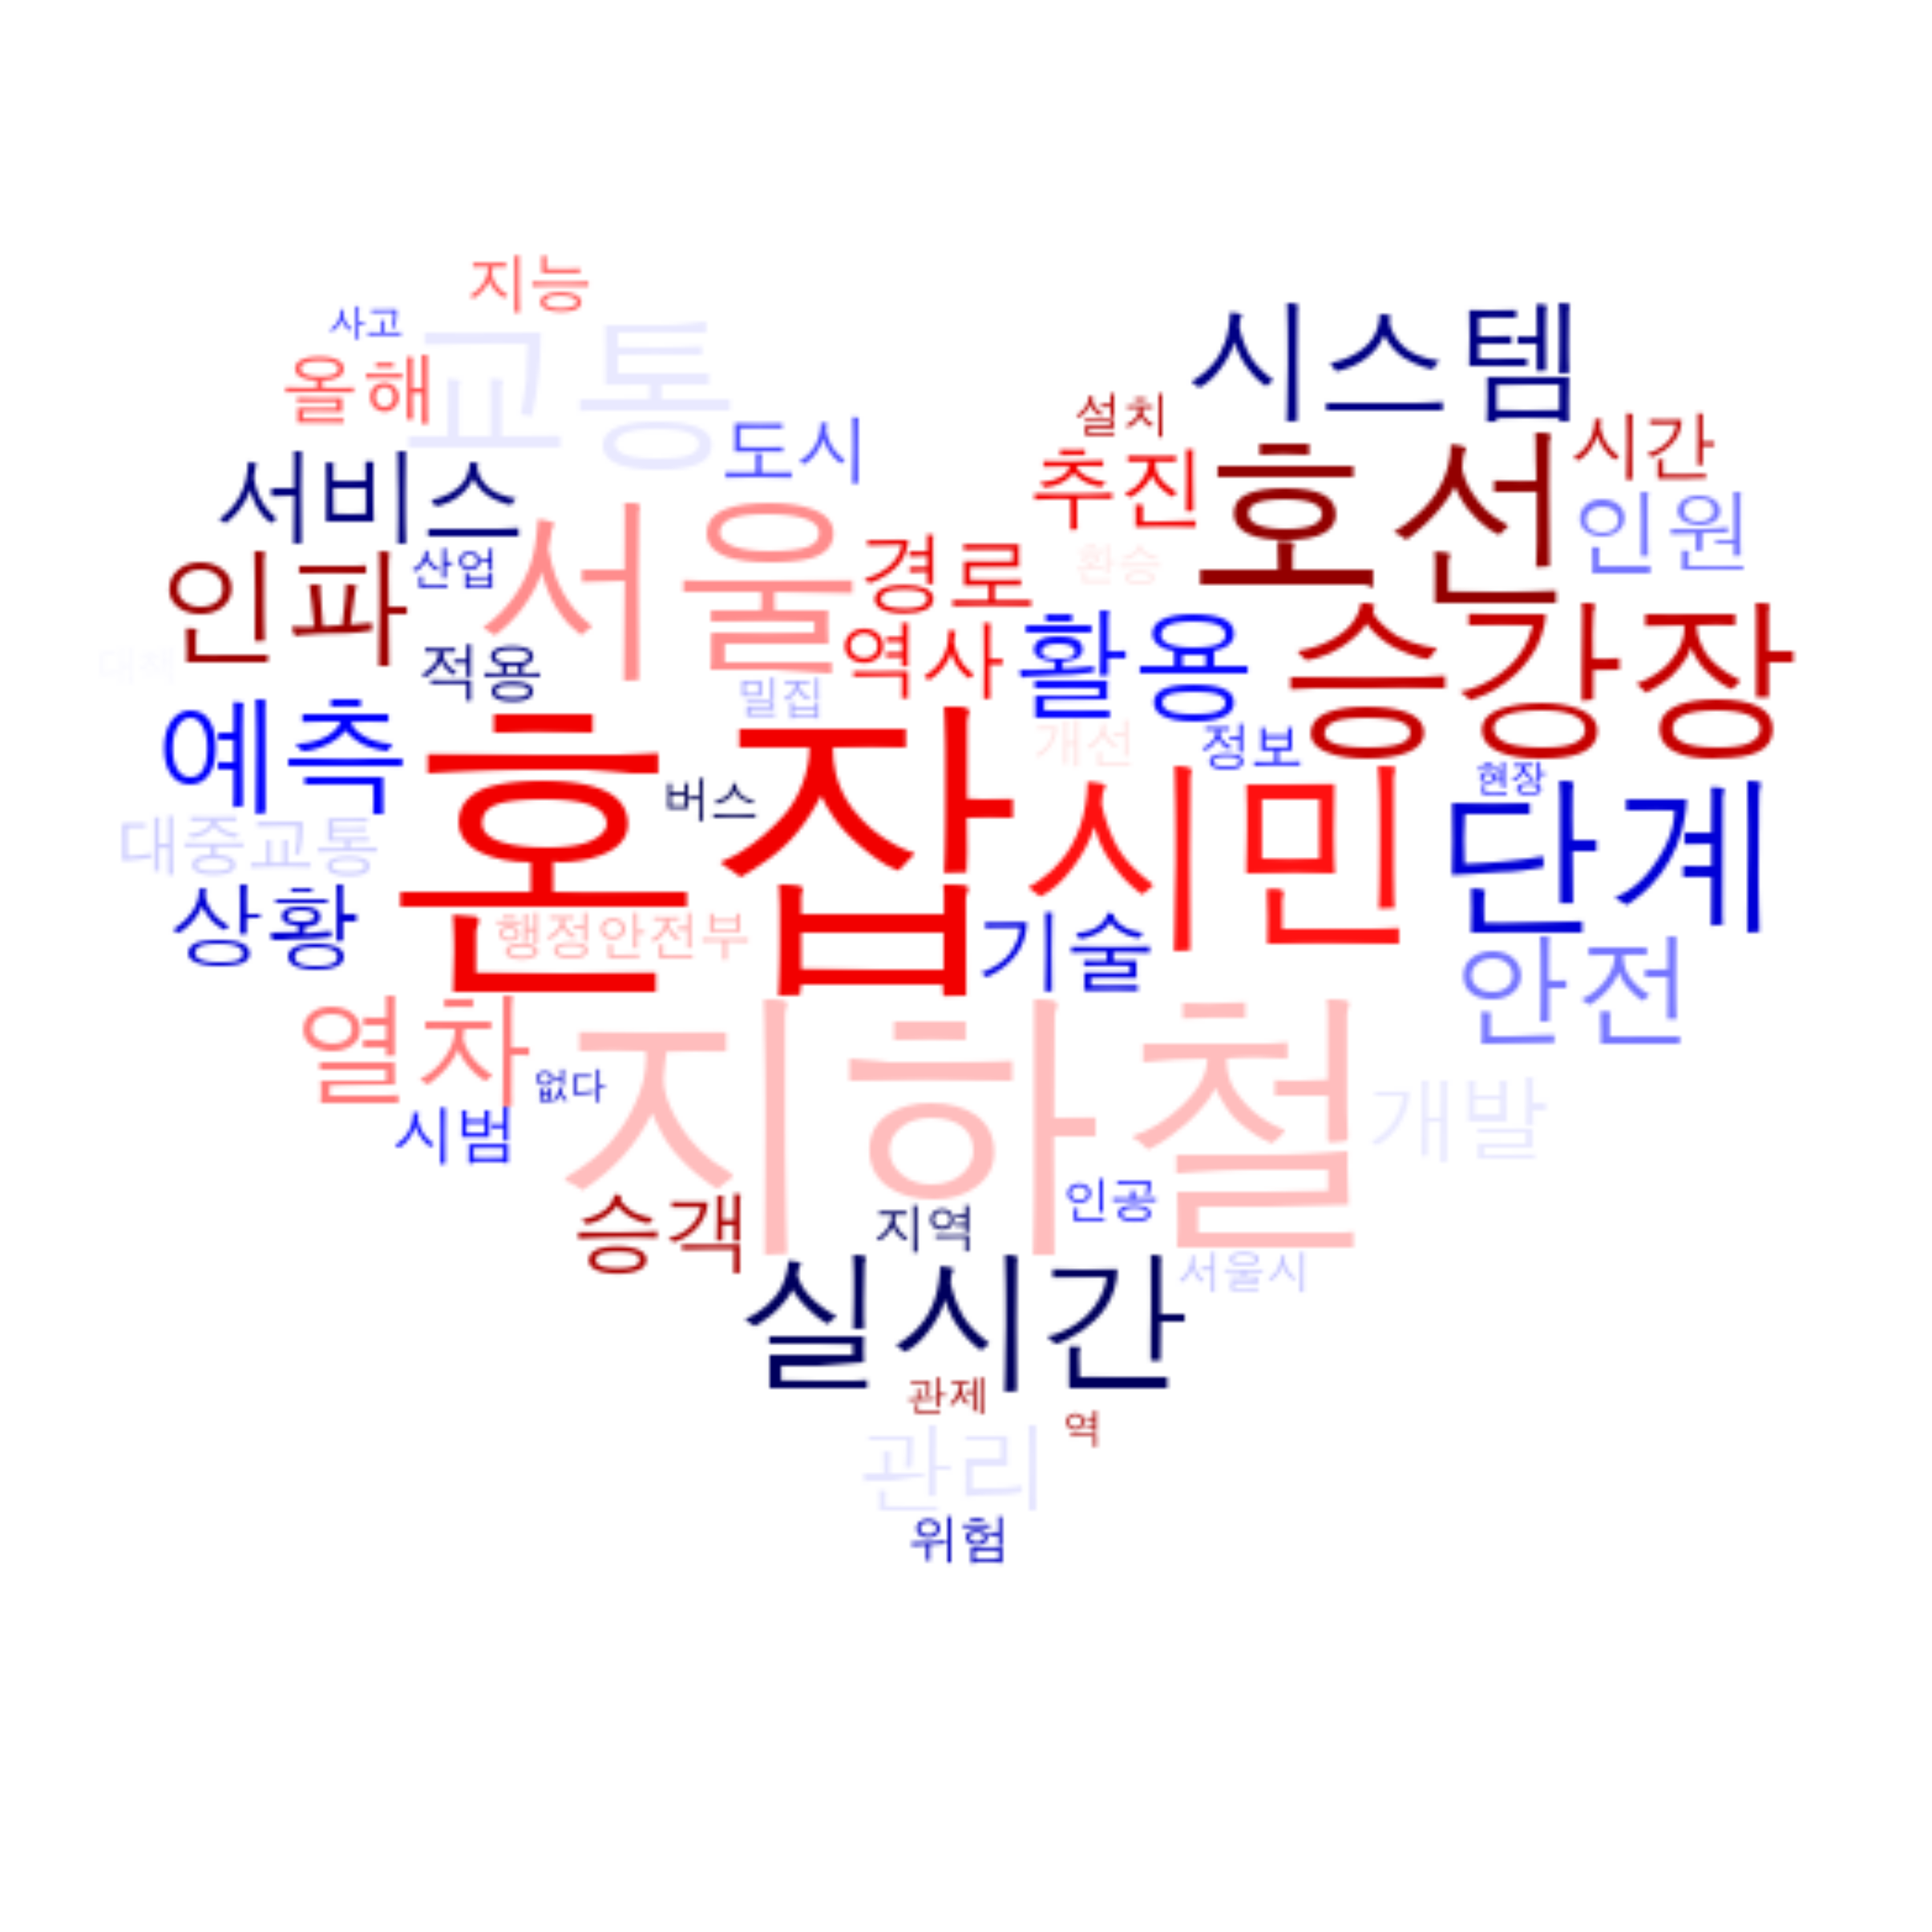

In [26]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 500

# plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

plt.show()

### WordCloud Image File로 저장하기
> to_file() Function 이용

In [27]:
from pathlib import Path

# Data_Images 폴더 생성
os.makedirs("Data_Images", exist_ok = True)

# 기본 파일 이름 설정
base_filename = "hearttype_kcloudword"
extension = ".png"
index = 1  # 파일 이름에 추가될 숫자
new_filename = base_filename + extension

# 동일한 파일 이름이 존재하는지 확인하고, 존재한다면 새로운 이름 생성
while Path(f"Data_Images/{new_filename}").exists() :
  new_filename = f"{base_filename}_{index}{extension}"
  index += 1

# Save WorldCloud Image
wordcloud.to_file(filename = f"Data_Images/{new_filename}")

### Seaborn Palette를 이용한 WordCloud Image 생성

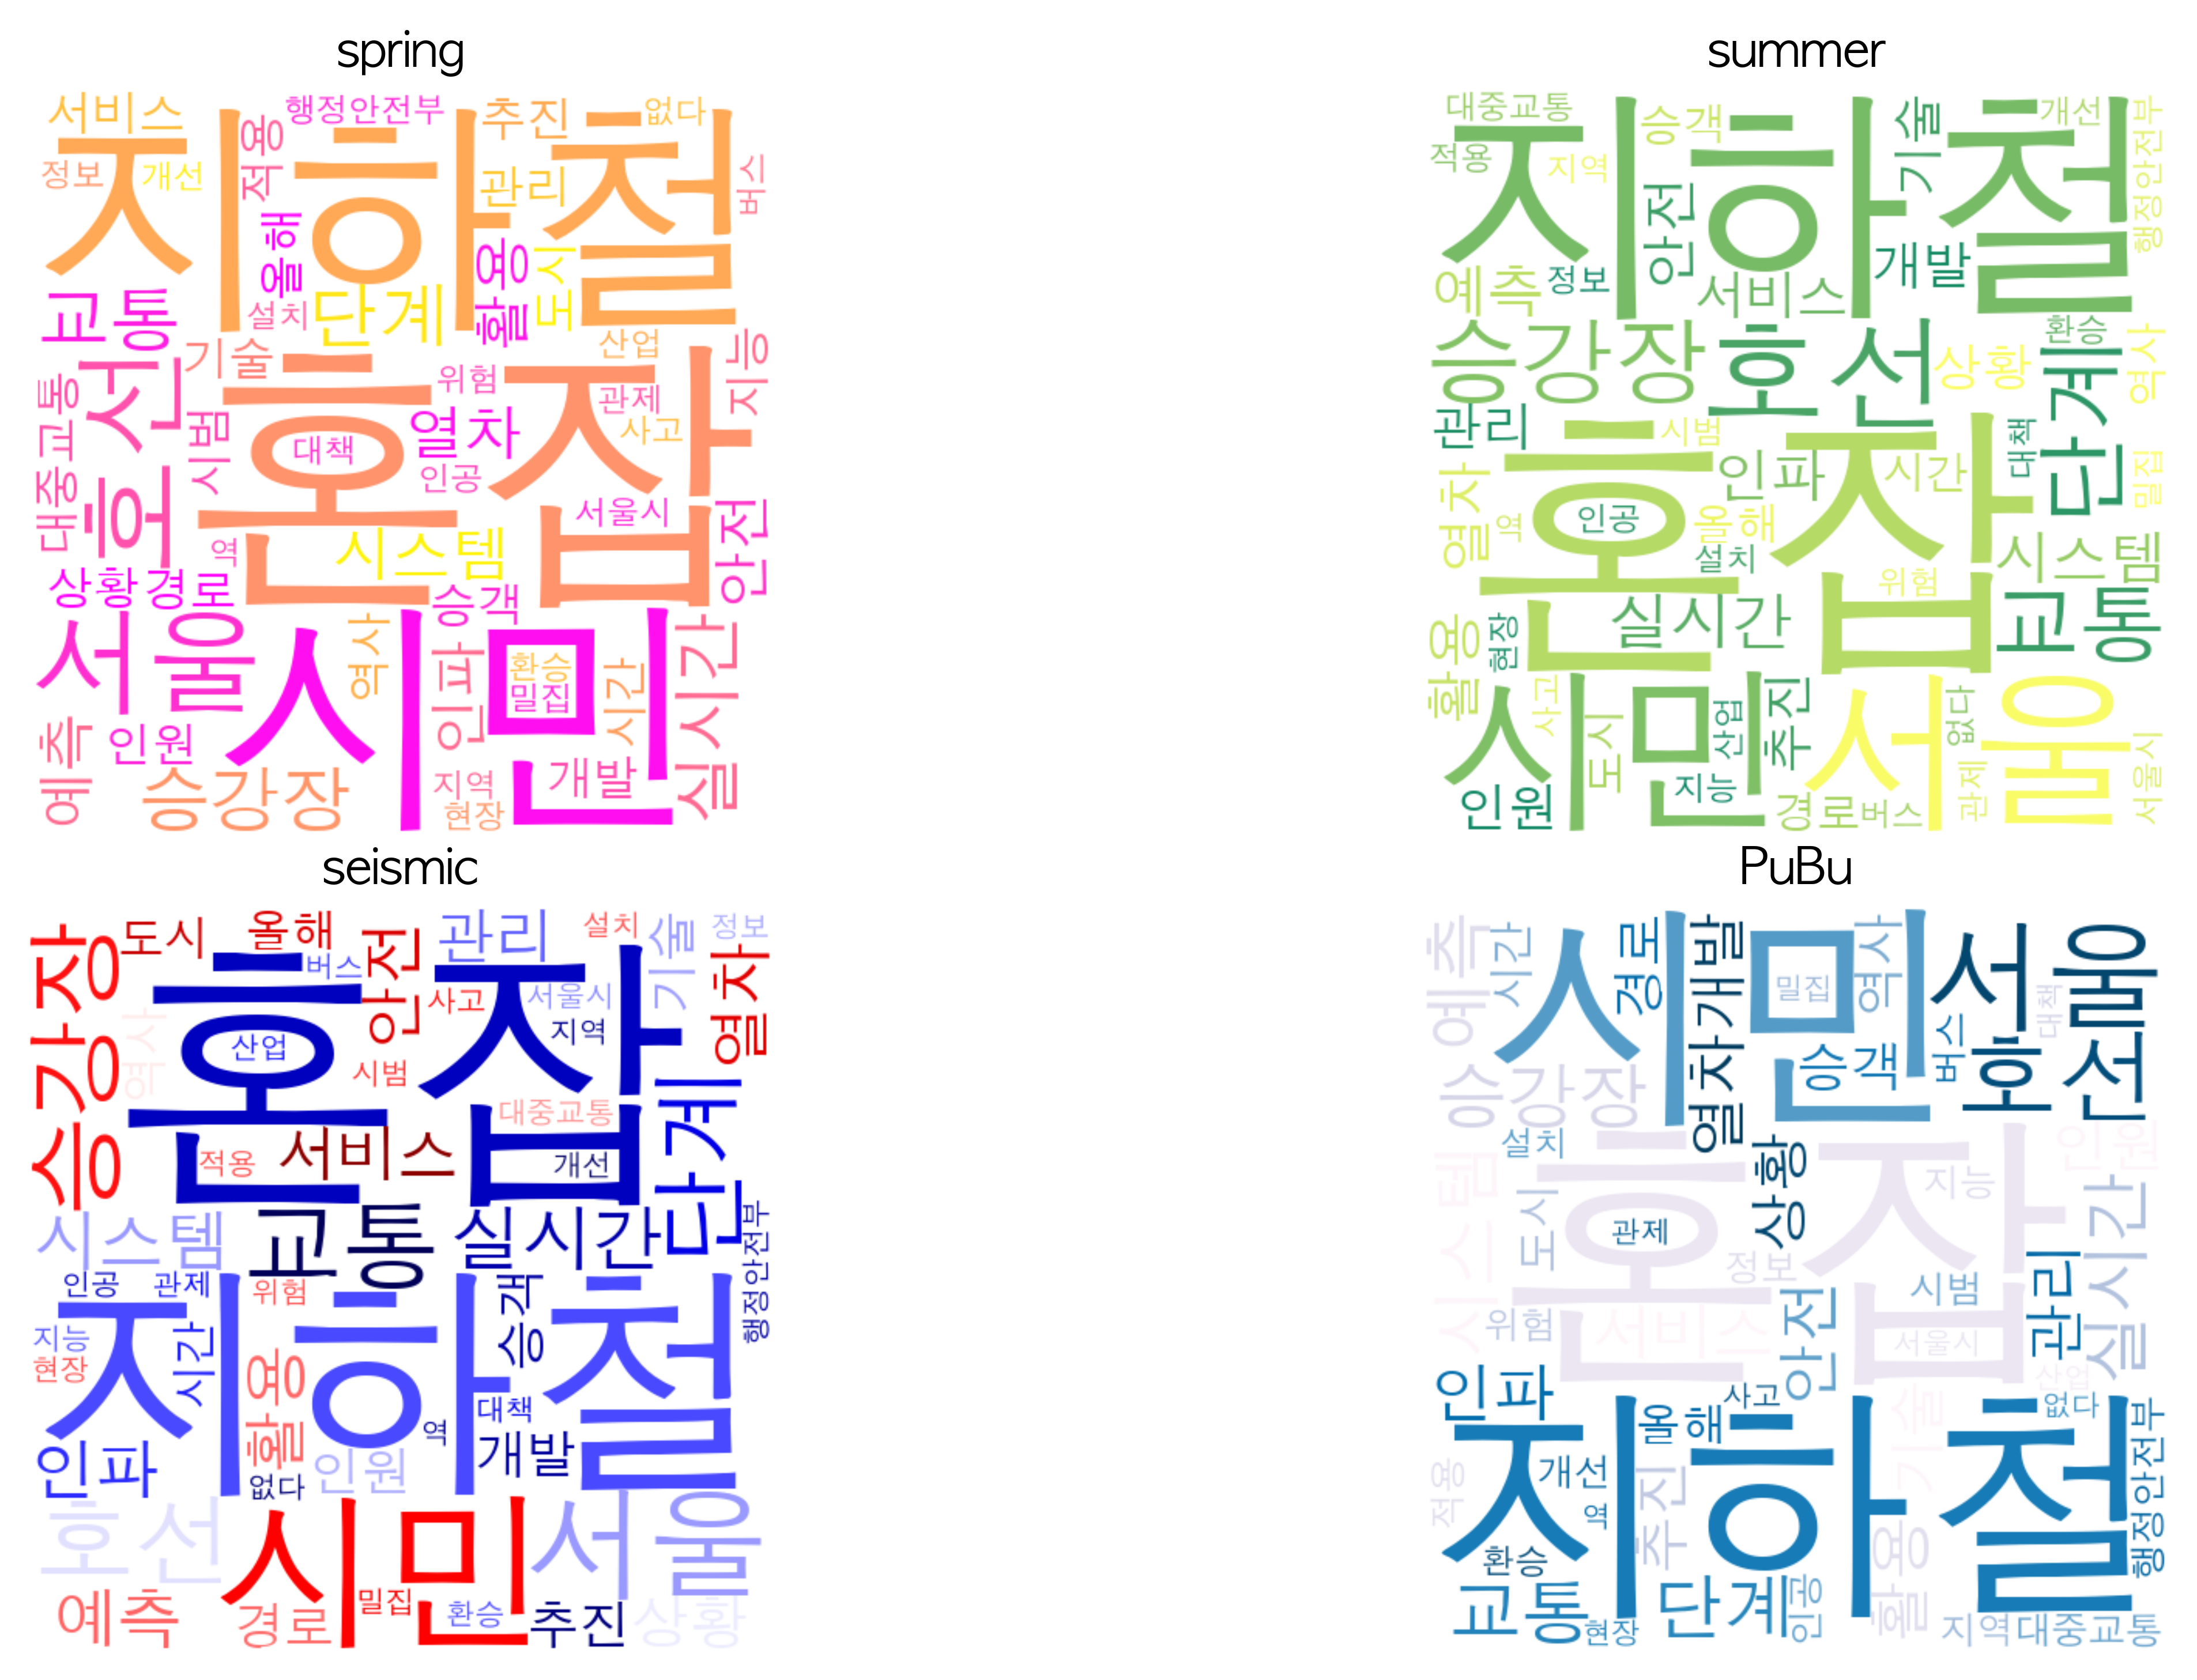

In [20]:
# Seaborn Palette
palettes = ['spring', 'summer', 'seismic', 'PuBu']
fig, ax = plt.subplots(2, 2)
fig.tight_layout()
axes = [ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1]]
plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

for i in range(4) :
  wordcloud = WordCloud(
    font_path ="AppleGothic", 
    background_color = 'white',
    width = 480,
    height = 480,
    colormap = palettes[i]
  ).generate(' '.join(tmp_data))

  axes[i].imshow(wordcloud, interpolation = 'bilinear')
  axes[i].set_title(palettes[i])
  axes[i].set_axis_off()